In [17]:
import pandas as pd

df = pd.read_csv("data/cross_validation_data_lemmatized.csv")

In [18]:
df[df["coherence_score"] > 0.013]

,no_topics,min_df,max_df,alpha,coherence_score
7401,5.0,0.08,0.99,0.10,0.013444
7402,5.0,0.08,0.99,0.15,0.013540
7421,5.0,0.08,0.98,0.10,0.013444
7422,5.0,0.08,0.98,0.15,0.013540
7441,5.0,0.08,0.97,0.10,0.013444
7442,5.0,0.08,0.97,0.15,0.013540
7461,5.0,0.08,0.96,0.10,0.013444
7462,5.0,0.08,0.96,0.15,0.013540
7481,5.0,0.08,0.95,0.10,0.013444
7482,5.0,0.08,0.95,0.15,0.013540


In [19]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

data = pd.read_csv("data/preprocessed_stories.csv", header=None, names=["story"])

# tokenize the data for corpus and dictionary
tokens_list = [story.split() for story in data["story"]]

# create a dictionary of the data and filter out the extremes
dictionary = Dictionary(tokens_list)

# create a corpus of the data
corpus = [dictionary.doc2bow(text) for text in tokens_list]

# get the coherence score of the topic model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=0, alpha=0.15)

In [20]:
dic = dict()

for bag in corpus:
    for word in bag:
        if dictionary.get(word[0]) in dic:
            dic[dictionary.get(word[0])][0] += word[1]
            dic[dictionary.get(word[0])][1] += 1

        else:
            dic[dictionary.get(word[0])] = [word[1], 1]



In [21]:
# turn the dictionary into a dataframe
df = pd.DataFrame.from_dict(dic, orient="index", columns=["count", "num_docs"])

In [22]:
df.sort_values(by="num_docs", ascending=False).head(20)

,count,num_docs
call,3671,1802
number,2863,1575
asked,2681,1563
received,1708,1444
scam,1856,1316
said,2264,1167
told,1911,1053
called,1385,1027
money,2137,1013
phone,1405,992


/tmp/ipykernel_14673/585349575.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


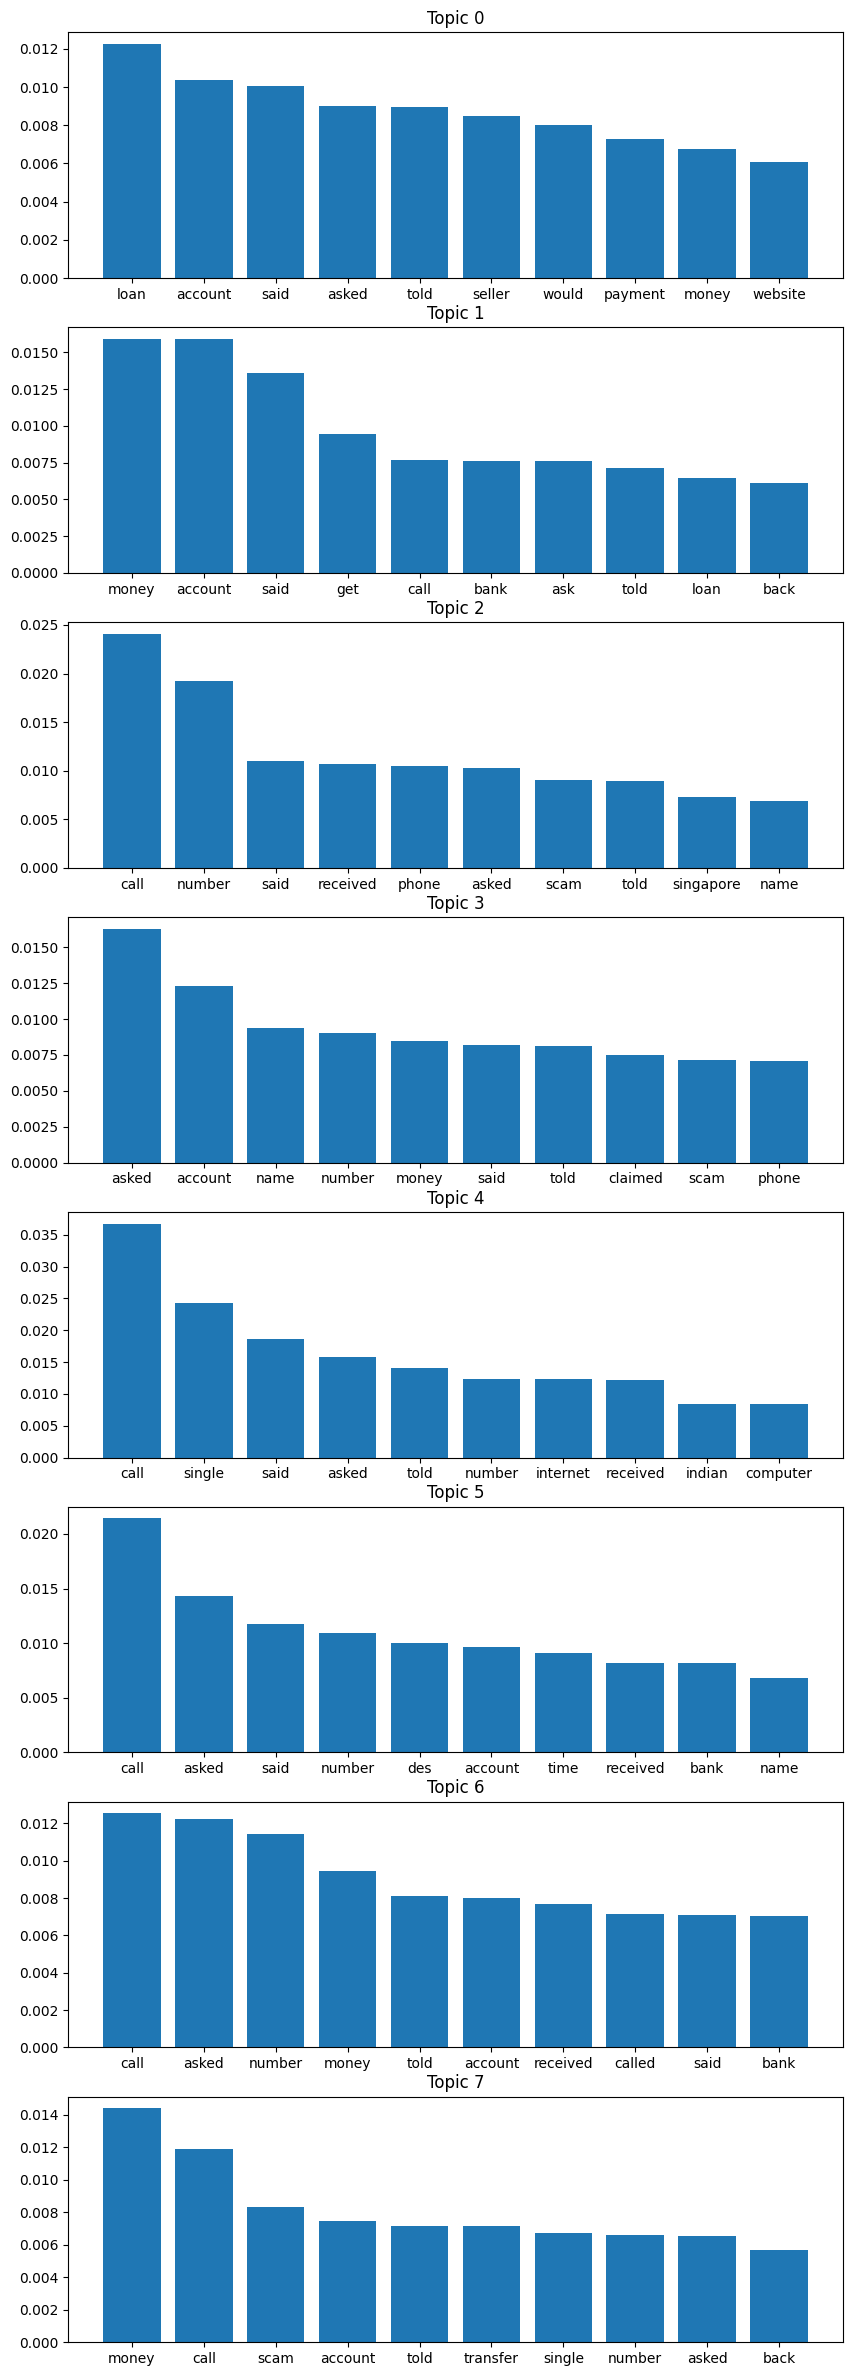

In [24]:
import matplotlib.pyplot as plt

# bar plot of the top 10 words for each topic
fig, axes = plt.subplots(8, 1, figsize=(10,30))

for i, ax in enumerate(axes.flatten()):
    words = lda.show_topic(i, topn=10)
    ax.bar([w[0] for w in words], [w[1] for w in words])
    ax.set_title(f'Topic {i}')

fig.show()